<p style="font-family: Times New Roman;font-size:18px;color:navy"><b>Degree Distribution Watts-Strogatz</b></p>

In [ ]:
n = 100 # Number of nodes
mean_degree = 11 # Mean degree

# Create the Watts-Strogatz graph
WS = nx.connected_watts_strogatz_graph(n=n, k=mean_degree, p=0.05)

# Create a random exponential degree distribution sequence
degree_sequence = np.random.exponential(scale=0.5, size=n)
degree_sequence = np.round(degree_sequence * mean_degree / np.mean(degree_sequence)).astype(int)

# Assign the degree sequence to the nodes in the graph
for i, (node, degree) in enumerate(zip(WS.nodes(), degree_sequence)):
    WS.nodes[node]['degree'] = degree

# Draw the graph
pos = nx.kamada_kawai_layout(WS)
nx.draw(WS, pos=pos, with_labels=True)
plt.title('Watts-Strogatz small-world network', fontsize=50)
plt.show()
#plt.savefig('watts_strogatz.png')

In [ ]:
# Compute degree and clustering coefficient for each node
degree = dict(G.degree())
clustering = nx.clustering(G)

# Create a scatter plot of degree vs. clustering coefficient
fig, ax = plt.subplots(figsize=(10, 5))

# Set the marker_size(s), marker_color(c), and transparency of the markers
ax.scatter(degree.values(), clustering.values(), s=100, c='royalblue', edgecolor='black', alpha=0.8)

# Set the labels and title of the plot
ax.set_xlabel('Degree')
ax.set_ylabel('Clustering Coefficient')
ax.set_title('Degree vs. Clustering Coefficient Scatter Plot')

# Show the plot
plt.show()
#plt.savefig('degree_vs_clustering_coefficient.png')

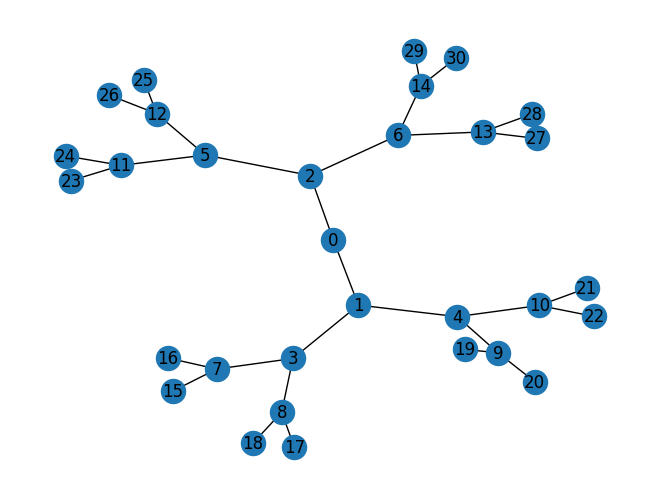

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a hierarchical network with 100 nodes and 4 levels
hierarchy = nx.balanced_tree(2, 4)

# Remove excess nodes to get 100 nodes
excess_nodes = len(hierarchy.nodes()) - 100
for i in range(excess_nodes):
    hierarchy.remove_node(max(hierarchy.nodes()))

# Draw the network
nx.draw(hierarchy, with_labels=True)
plt.show()

<p style="font-family: Times New Roman;font-size:18px;color:navy"><b>3.2.1. Male graph PRE.</b></p>

In [21]:
# Get the nodes representing male scientists
male_nodes_PRE = [n for n, d in PRE.nodes(data=True) if d['gender'] == 0]

# Create a subgraph containing only these nodes
M_PRE = PRE.subgraph(male_nodes_PRE)

print('Graph with', M_PRE.number_of_nodes(),'nodes and', M_PRE.number_of_edges(), 'edges.')
print('Is the graph connected?',nx.is_connected(M_PRE))

Graph with 271 nodes and 746 edges.
Is the graph connected? False


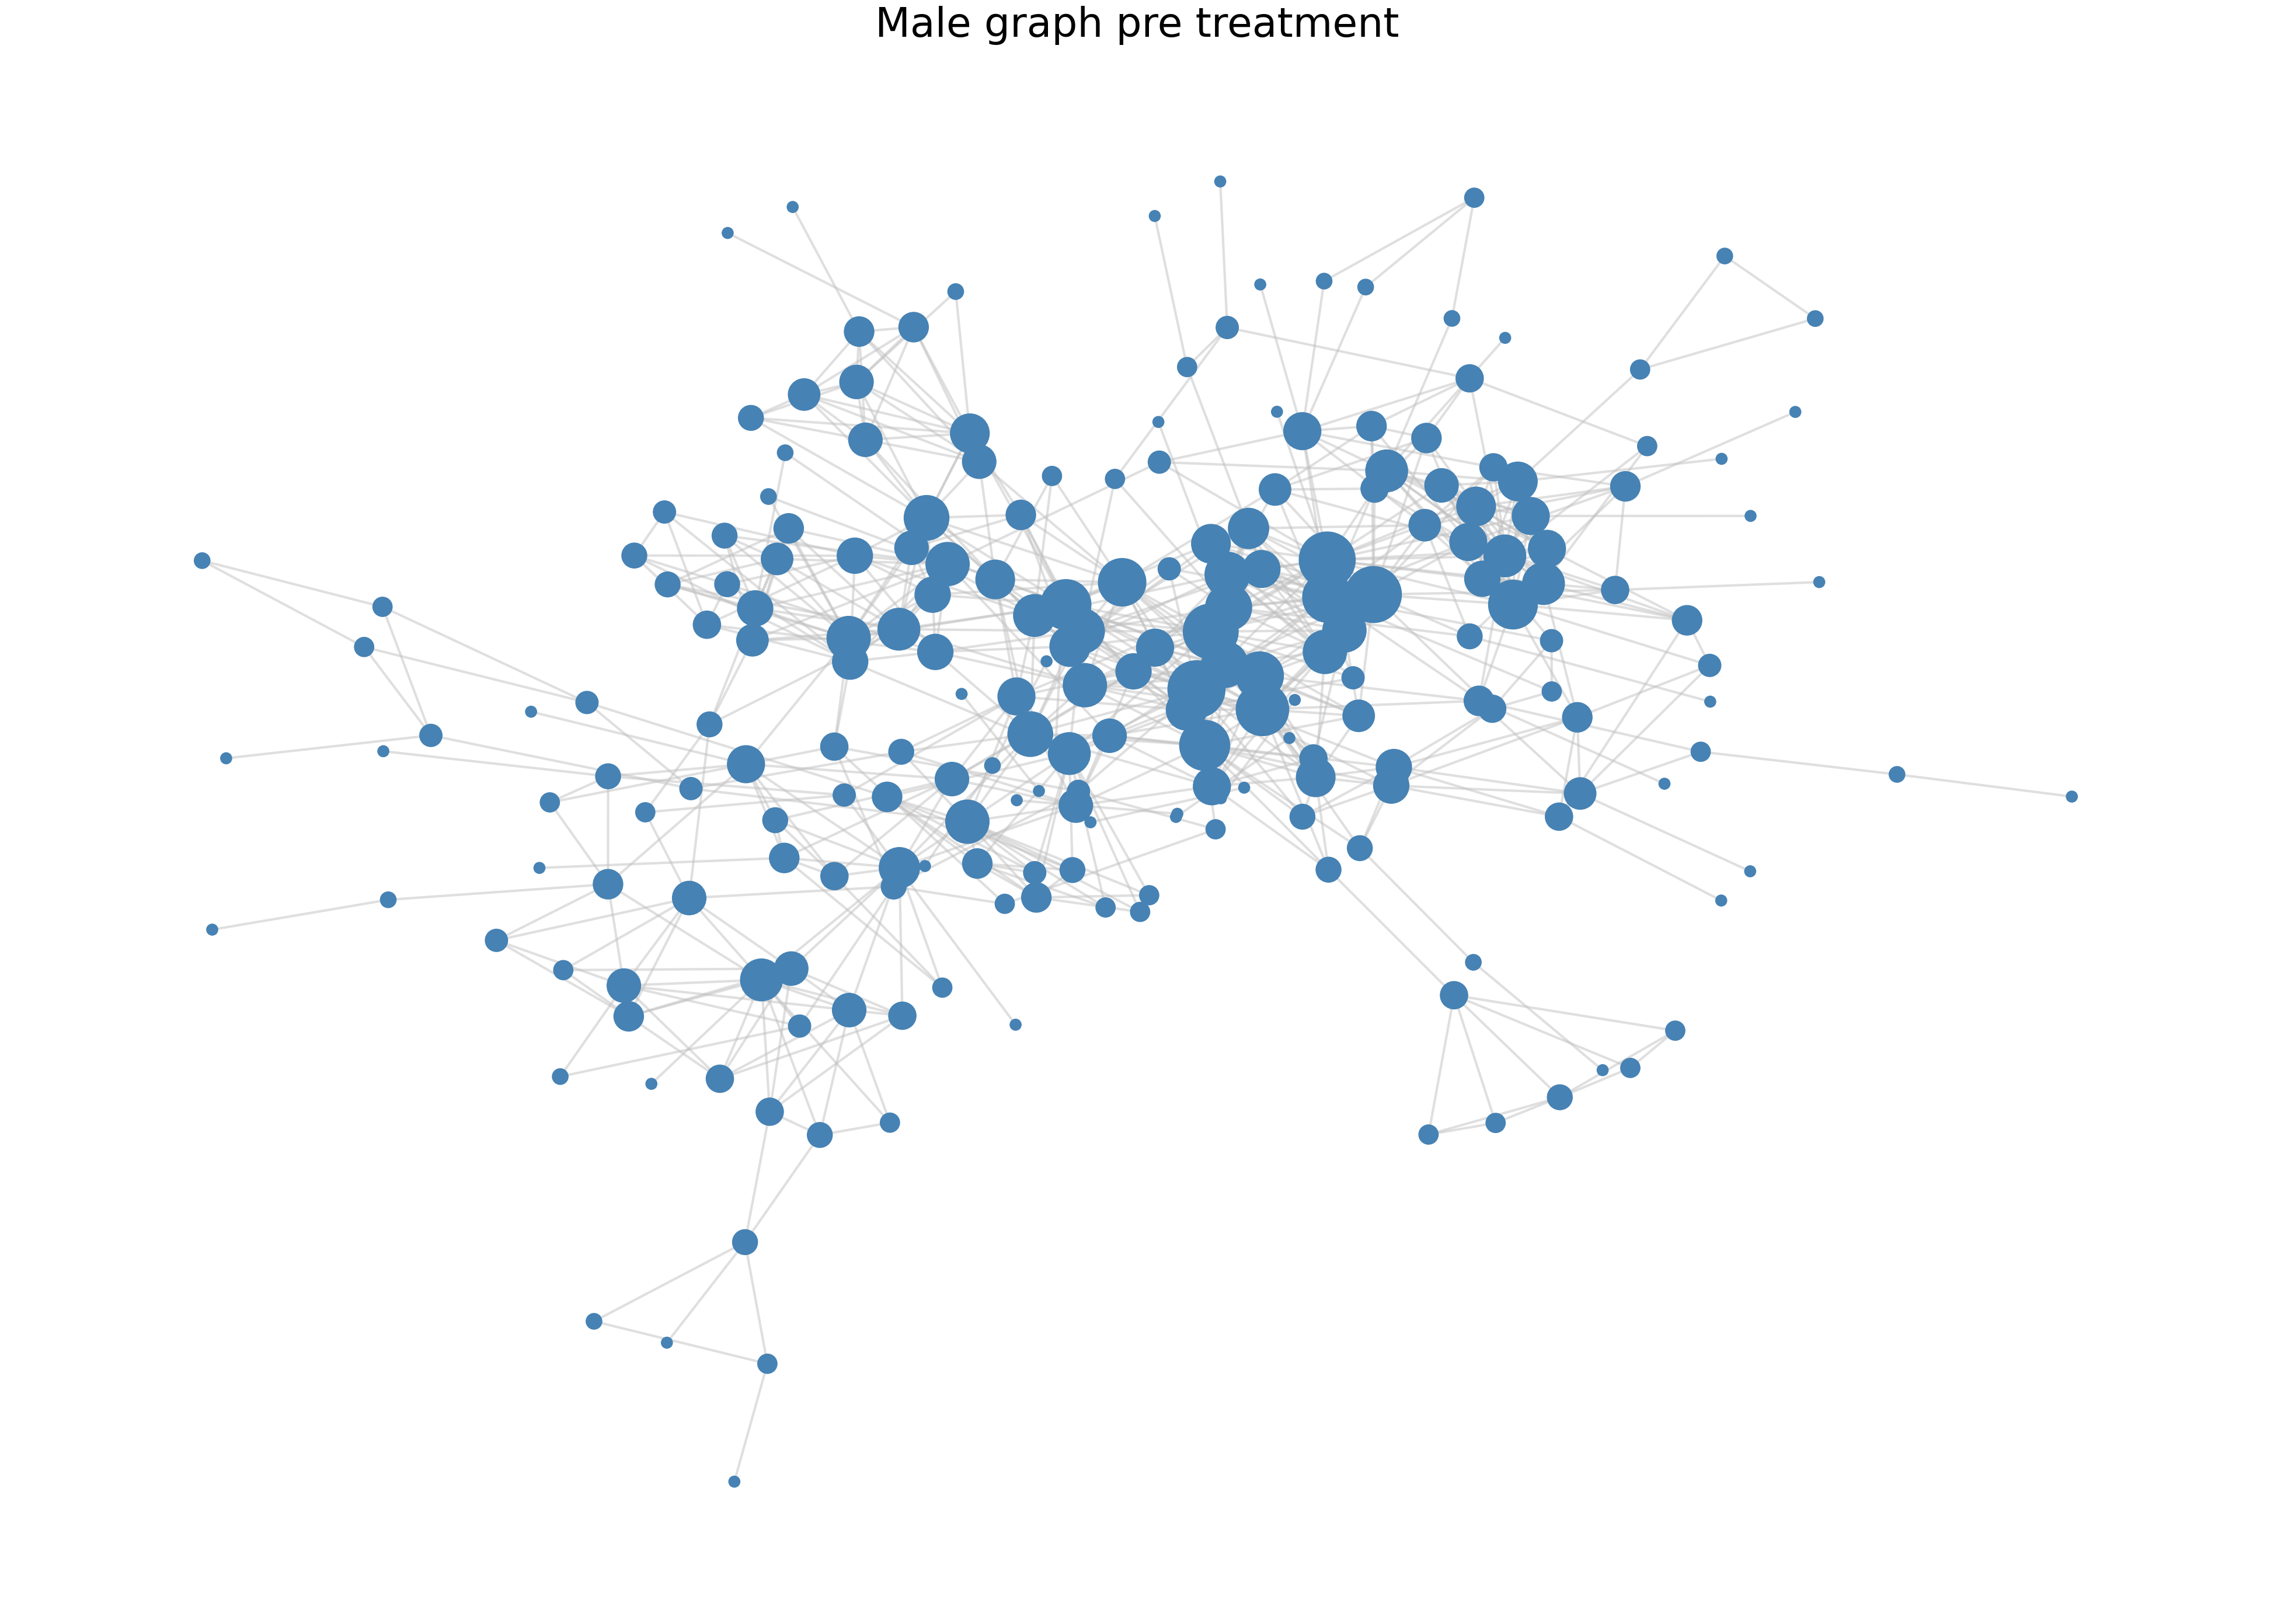

In [22]:
# Choose layout
pos = nx.kamada_kawai_layout(M_PRE)

# Get the degree list 
degrees = [d for n,d in M_PRE.degree()]
degree_min = min(degrees)
degree_max = max(degrees)
degrees = [(d-degree_min)/(degree_max - degree_min)*5000 for d in degrees]

# Draw the nodes, sized to their degree 
nx.draw_networkx_nodes(M_PRE, pos, node_size=[v for v in degrees], node_color='steelblue')

# Draw the edges
nx.draw_networkx_edges(M_PRE, pos, edge_color='silver', width=3.0, alpha=0.5)

plt.rcParams['figure.figsize'] = [50, 35]

# Set the axis to be off
plt.axis('off')
plt.title('Male graph pre treatment', fontsize=50)
plt.show()
#plt.savefig('figures/male_graph_pre.svg',format='svg')

<p style="font-family: Times New Roman;font-size:16px;color:navy"><b>3.2.1.1. Male graph PRE averages.</b></p>

In [23]:
# Average nodes' degree 
avg_degree_M_PRE = sum([degree for node, degree in M_PRE.degree()])/M_PRE.number_of_nodes()
print('Average degree Male pre: ' + str(avg_degree_M_PRE))

# Average local clustering coefficient
avg_clust_M_PRE = nx.average_clustering(M_PRE)
print('Average clustering coefficient Male pre:', avg_clust_M_PRE)

# Global clustering coefficient (transitivity)
transv_M_PRE = nx.transitivity(M_PRE)
print('Transitivity Male pre:', transv_M_PRE)

Average degree Male pre: 5.5055350553505535
Average clustering coefficient Male pre: 0.3497280763244011
Transitivity Male pre: 0.4421465968586387


In [24]:
#Average closeness centrality
closeness_M_PRE = nx.closeness_centrality(M_PRE)
avg_closeness_M_PRE = sum(closeness_M_PRE.values()) / len(closeness_M_PRE)
print("Average closeness centrality Male pre:", avg_closeness_M_PRE)

#Average eigenvector centrality
eigenvector_M_PRE = nx.eigenvector_centrality(M_PRE, max_iter=1000)
avg_eigenvector_M_PRE = sum(eigenvector_M_PRE.values()) / len(eigenvector_M_PRE)
print("Average eigenvector centrality Male pre:", avg_eigenvector_M_PRE)

#Average betweenness centrality
betweenness_M_PRE = nx.betweenness_centrality(M_PRE)
avg_betweenness_M_PRE = sum(betweenness_M_PRE.values()) / len(betweenness_M_PRE)
print("Average betweenness centrality Male pre:", avg_betweenness_M_PRE)

Average closeness centrality Male pre: 0.14304859201635448
Average eigenvector centrality Male pre: 0.028850145363672242
Average betweenness centrality Male pre: 0.00689619783434513


<p style="font-family: Times New Roman;font-size:18px;color:navy"><b>3.2.2. Female graph PRE.</b></p>

In [25]:
# Get the nodes representing female scientists
female_nodes_PRE = [n for n, d in PRE.nodes(data=True) if d['gender'] == 1]

# Create a subgraph containing only these nodes
F_PRE = PRE.subgraph(female_nodes_PRE)

print('Graph with', F_PRE.number_of_nodes(),'nodes and', F_PRE.number_of_edges(), 'edges.')
print('Is the graph connected?',nx.is_connected(F_PRE))
print('Female PRE density:',nx.density(F_PRE))

Graph with 110 nodes and 76 edges.
Is the graph connected? False
Female PRE density: 0.01267723102585488


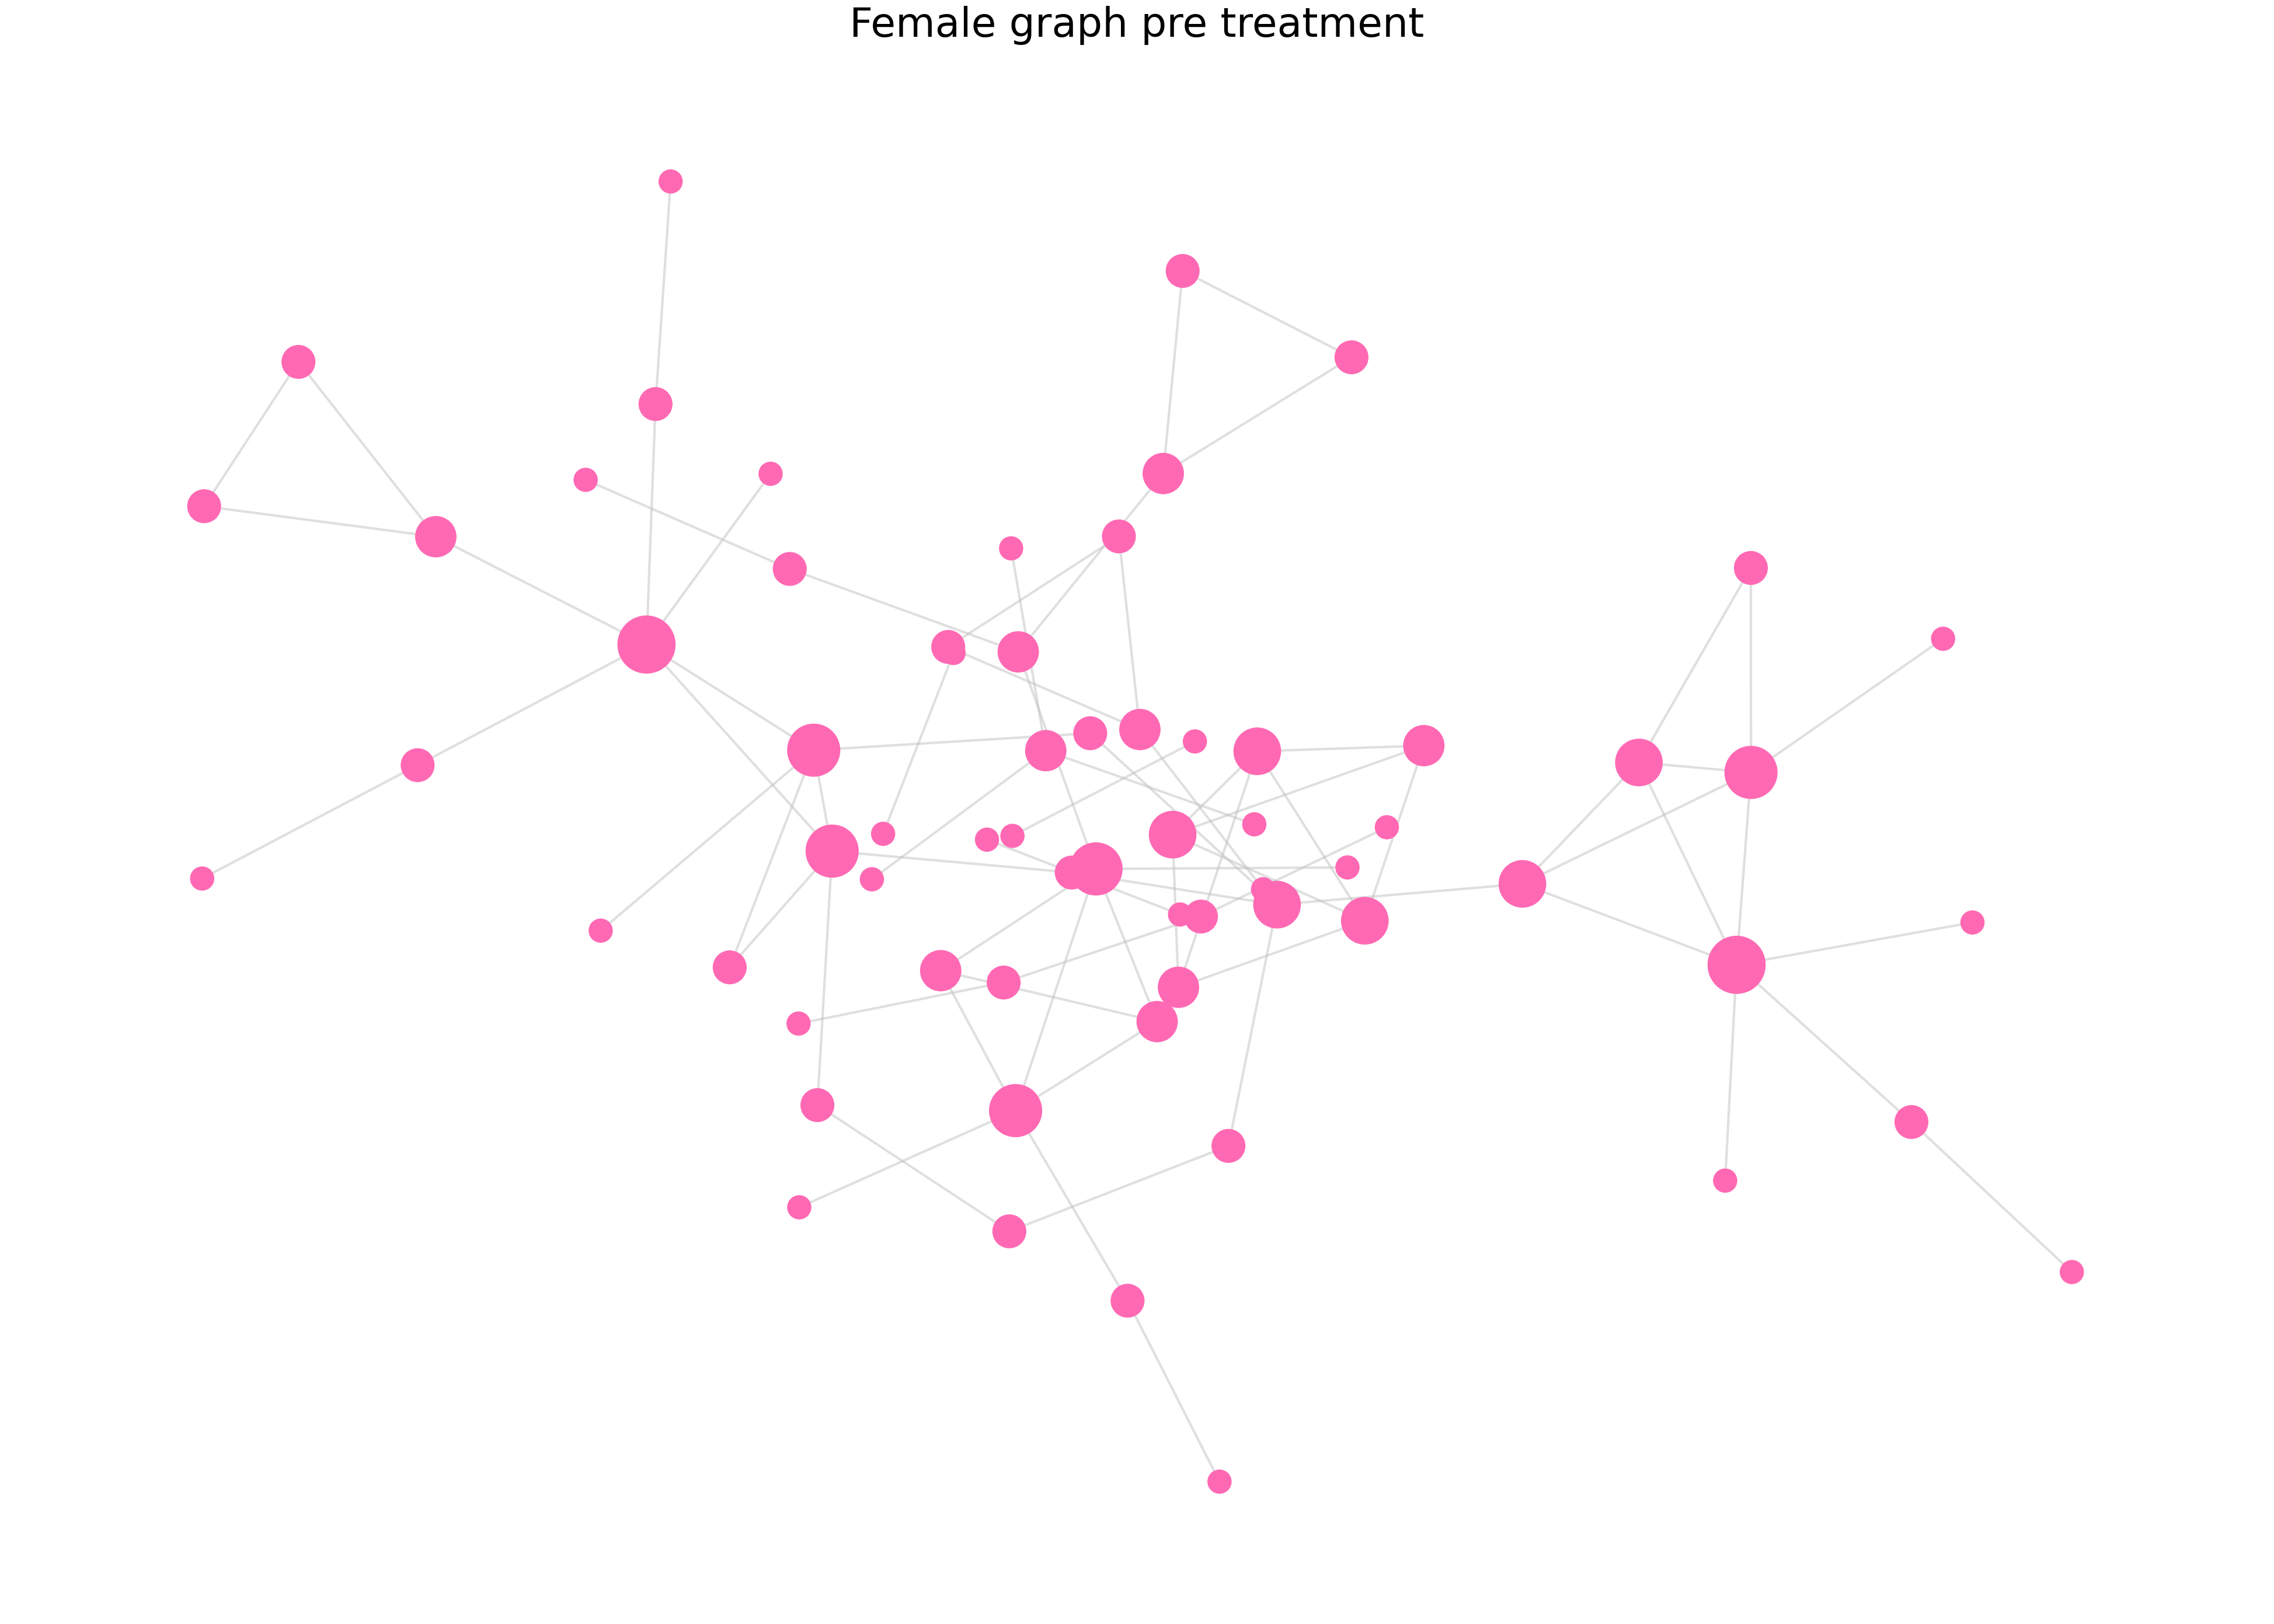

In [26]:
# Choose layout
pos = nx.kamada_kawai_layout(F_PRE)

# Get the degree list 
degrees = [d for n,d in F_PRE.degree()]
degree_min = min(degrees)
degree_max = max(degrees)
degrees = [(d-degree_min)/(degree_max - degree_min)*5000 for d in degrees]

# Draw the nodes, sized to their degree 
nx.draw_networkx_nodes(F_PRE, pos, node_size=[v for v in degrees], node_color='hotpink')

# Draw the edges
nx.draw_networkx_edges(F_PRE, pos, edge_color='silver', width=3.0, alpha=0.5)

plt.rcParams['figure.figsize'] = [50, 35]

# Set the axis to be off
plt.axis('off')
plt.title('Female graph pre treatment', fontsize=50)
plt.show()
#plt.savefig('figures/female_graph_pre.svg',format='svg')

<p style="font-family: Times New Roman;font-size:16px;color:navy"><b>3.2.2.1. Female averages PRE.</b></p>

In [27]:
# Average nodes' degree 
avg_degree_F_PRE = sum([degree for node, degree in F_PRE.degree()])/F_PRE.number_of_nodes()
print('Average degree Female pre-treatment: ' + str(avg_degree_F_PRE))

# Average local clustering coefficient
avg_clust_F_PRE = nx.average_clustering(F_PRE)
print('Average clustering coefficient Female pre-treatment:', avg_clust_F_PRE)

# Global clustering coefficient (transitivity)
transv_F_PRE = nx.transitivity(F_PRE)
print('Transitivity Female pre-treatment:', transv_F_PRE)

Average degree Female pre-treatment: 1.3818181818181818
Average clustering coefficient Female pre-treatment: 0.16666666666666666
Transitivity Female pre-treatment: 0.38650306748466257


In [28]:
#Average closeness centrality
closeness_F_PRE = nx.closeness_centrality(F_PRE)
avg_closeness_F_PRE = sum(closeness_F_PRE.values()) / len(closeness_F_PRE)
print("Average closeness centrality Female pre-treatment:", avg_closeness_F_PRE)

#Average eigenvector centrality
eigenvector_F_PRE = nx.eigenvector_centrality(F_PRE, max_iter=5000)
avg_eigenvector_F_PRE = sum(eigenvector_F_PRE.values()) / len(eigenvector_F_PRE)
print("Average eigenvector centrality Female pre-treatment:", avg_eigenvector_F_PRE)

#Average betweenness centrality
betweenness_F_PRE = nx.betweenness_centrality(F_PRE)
avg_betweenness_F_PRE = sum(betweenness_F_PRE.values()) / len(betweenness_F_PRE)
print("Average betweenness centrality Female pre-treatment:", avg_betweenness_F_PRE)

Average closeness centrality Female pre-treatment: 0.02685502873129137
Average eigenvector centrality Female pre-treatment: 0.030493590248191423
Average betweenness centrality Female pre-treatment: 0.0022101751459549625
